In [14]:
# Importing some must-have libraries, I haven't decided how much of these I will use but these are my go-to's
import pandas as pd  # For data wrangling and analysis
import numpy as np  # For numerical operations and array handling
import seaborn as sns  # For cool and easy visualizations

import matplotlib.pyplot as plt  # Basic plotting
import matplotlib.mlab as mlab  # Matlab-like functions, though it's kind of outdated
import matplotlib  # Main module for tweaking settings and styles
plt.style.use('ggplot')  # Setting a nice ggplot style

from matplotlib.pyplot import figure  # To create new figures

# This makes sure plots show up in the notebook (if using Jupyter)
%matplotlib inline

# Setting default figure size to make plots look better
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Turning off that annoying chained assignment warning in pandas
pd.options.mode.chained_assignment = None


# Load the dataset
data = pd.read_excel(r'C:\Users\ati_n\Downloads\Financial_Data_2013_2023.xlsx')

print(data.head())


        Date  SP500_Close  US_Treasury_Yield  Interest_Rate
0 2013-01-01          NaN                NaN           0.14
1 2013-01-02  1462.420044              1.839           0.14
2 2013-01-03  1459.369995              1.899           0.14
3 2013-01-04  1466.469971              1.915           0.14
4 2013-01-07  1461.890015              1.903           0.14


In [2]:
import pandas as pd

# That little r really matters :)
data = pd.read_excel(r'C:\Users\ati_n\Downloads\Financial_Data_2013_2023.xlsx')

# Display the first few rows of the dataset
print(data.head())


        Date  SP500_Close  US_Treasury_Yield  Interest_Rate
0 2013-01-01          NaN                NaN           0.14
1 2013-01-02  1462.420044              1.839           0.14
2 2013-01-03  1459.369995              1.899           0.14
3 2013-01-04  1466.469971              1.915           0.14
4 2013-01-07  1461.890015              1.903           0.14


In [3]:
# Calculate correlation matrix
correlation_matrix = data.corr()

print(correlation_matrix)

# Save to an Excel file
#correlation_matrix.to_excel('Correlation_Matrix.xlsx')


                       Date  SP500_Close  US_Treasury_Yield  Interest_Rate
Date               1.000000     0.953652           0.194886       0.614990
SP500_Close        0.953652     1.000000           0.164303       0.498885
US_Treasury_Yield  0.194886     0.164303           1.000000       0.745066
Interest_Rate      0.614990     0.498885           0.745066       1.000000


In [5]:
#pearson,kendall, spearman

# Pearson correlation
pearson_corr = data.corr(method='pearson')
print("Pearson correlation matrix:")
print(pearson_corr)

# Kendall 
kendall_corr = data.corr(method='kendall')
print("\nKendall correlation matrix:")
print(kendall_corr)

# Spearman 
spearman_corr = data.corr(method='spearman')
print("\nSpearman correlation matrix:")
print(spearman_corr)


Pearson correlation matrix:
                       Date  SP500_Close  US_Treasury_Yield  Interest_Rate
Date               1.000000     0.953652           0.194886       0.614990
SP500_Close        0.953652     1.000000           0.164303       0.498885
US_Treasury_Yield  0.194886     0.164303           1.000000       0.745066
Interest_Rate      0.614990     0.498885           0.745066       1.000000

Kendall correlation matrix:
                       Date  SP500_Close  US_Treasury_Yield  Interest_Rate
Date               1.000000     0.870163           0.061171       0.410622
SP500_Close        0.870163     1.000000           0.030972       0.326532
US_Treasury_Yield  0.061171     0.030972           1.000000       0.419529
Interest_Rate      0.410622     0.326532           0.419529       1.000000

Spearman correlation matrix:
                       Date  SP500_Close  US_Treasury_Yield  Interest_Rate
Date               1.000000     0.971037           0.107003       0.419552
SP500_Close  

In [9]:
#Checking Data Types
data.dtypes

Date                 datetime64[ns]
SP500_Close                 float64
US_Treasury_Yield           float64
Interest_Rate               float64
dtype: object

In [22]:
# Checking for missing values
print(data.isnull().sum())


Date                 0
SP500_Close          1
US_Treasury_Yield    1
Interest_Rate        0
dtype: int64


In [25]:

# Fill or drop missing values if any
data = data.dropna()  # Simple option, but in somecases filling missing values in a specific way works better

In [24]:
# Descriptive statistics
print(data.describe())

                                Date  SP500_Close  US_Treasury_Yield  \
count                           2813  2813.000000        2813.000000   
mean   2018-06-29 11:46:56.779239168  2880.264348           2.312234   
min              2013-01-02 00:00:00  1457.150024           0.499000   
25%              2015-09-29 00:00:00  2070.770020           1.757000   
50%              2018-06-29 00:00:00  2711.020020           2.296000   
75%              2021-03-29 00:00:00  3809.840088           2.783000   
max              2023-12-29 00:00:00  4796.560059           4.988000   
std                              NaN   943.841295           0.852848   

       Interest_Rate  
count    2813.000000  
mean        1.168663  
min         0.050000  
25%         0.090000  
50%         0.380000  
75%         1.830000  
max         5.330000  
std         1.504831  


In [26]:
# Correlation analysis
correlation_matrix = data.corr()
print(correlation_matrix)

                       Date  SP500_Close  US_Treasury_Yield  Interest_Rate
Date               1.000000     0.953652           0.194886       0.614948
SP500_Close        0.953652     1.000000           0.164303       0.498885
US_Treasury_Yield  0.194886     0.164303           1.000000       0.745066
Interest_Rate      0.614948     0.498885           0.745066       1.000000


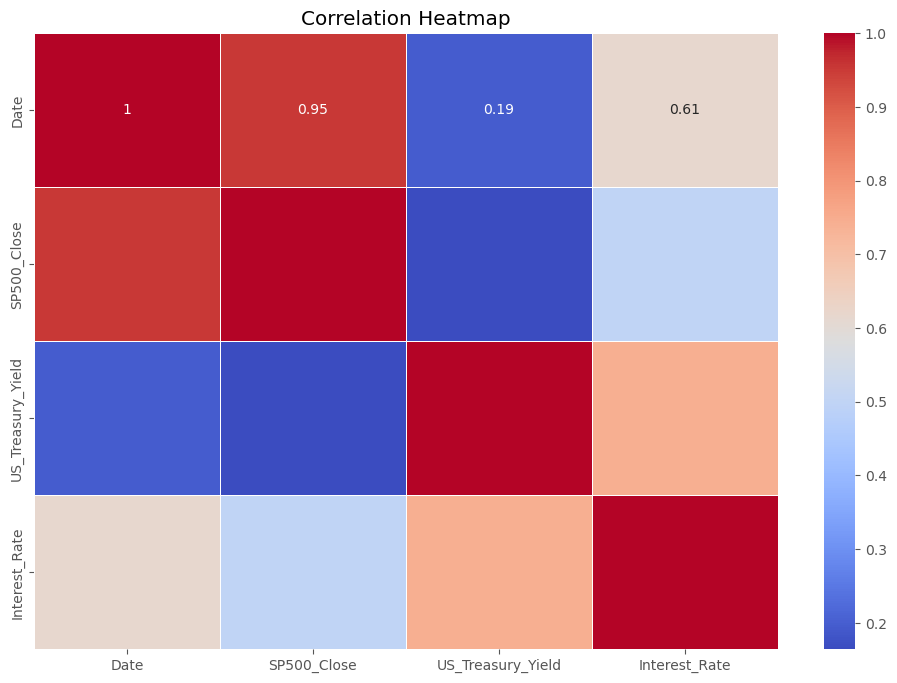

In [28]:
# Heatmap for correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
#Checking if the past values of US_Treasury_Yield or Interest_Rate can predict SP500_Close.
data['Lagged_Treasury_Yield'] = data['US_Treasury_Yield'].shift(1)
data['Lagged_Interest_Rate'] = data['Interest_Rate'].shift(1)

# Now check the correlation again
lagged_correlation_matrix = data.corr()
print(lagged_correlation_matrix)


                           Date  SP500_Close  US_Treasury_Yield  \
Date                   1.000000     0.953652           0.194886   
SP500_Close            0.953652     1.000000           0.164303   
US_Treasury_Yield      0.194886     0.164303           1.000000   
Interest_Rate          0.614948     0.498885           0.745066   
Lagged_Treasury_Yield  0.193982     0.162486           0.998182   
Lagged_Interest_Rate   0.614407     0.498077           0.743673   

                       Interest_Rate  Lagged_Treasury_Yield  \
Date                        0.614948               0.193982   
SP500_Close                 0.498885               0.162486   
US_Treasury_Yield           0.745066               0.998182   
Interest_Rate               1.000000               0.746079   
Lagged_Treasury_Yield       0.746079               1.000000   
Lagged_Interest_Rate        0.999691               0.744727   

                       Lagged_Interest_Rate  
Date                               0.61440

In [34]:
# Conclusion
# So we can see from numbers and the heatmap too that the SP500 index has a strong upward trend over time, 
# high correlation with the date.

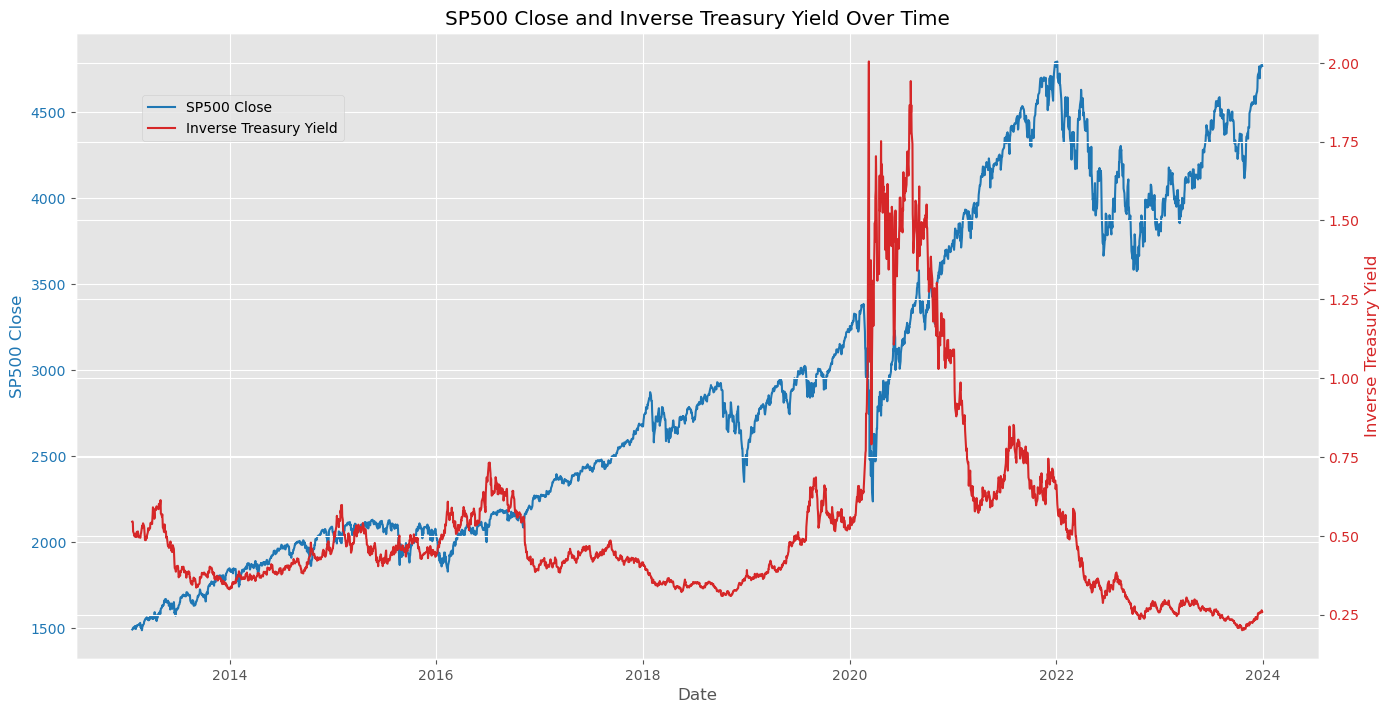

In [41]:
# Also there is a possible inverse relation

# to find the inverse relation, creating a new column 
data['Inverse_Treasury_Yield'] = 1 / data['US_Treasury_Yield']

# Overlay plot with dual axes
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(data['Date'], data['SP500_Close'], color='tab:blue', label='SP500 Close')
ax1.set_xlabel('Date')
ax1.set_ylabel('SP500 Close', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(data['Date'], data['Inverse_Treasury_Yield'], color='tab:red', label='Inverse Treasury Yield')
ax2.set_ylabel('Inverse Treasury Yield', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('SP500 Close and Inverse Treasury Yield Over Time')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()


In [39]:
data

,Date,SP500_Close,US_Treasury_Yield,Interest_Rate,Lagged_Treasury_Yield,Lagged_Interest_Rate,Monthly_Return,Inverse_Treasury_Yield,Pct_Change_SP500,Pct_Change_Inverse_Yield,Rolling_Correlation
13,2013-01-18,1485.979980,1.843,0.14,1.875,0.14,0.003403,0.542594,0.003403,0.017363,-0.403535
14,2013-01-22,1492.560059,1.835,0.14,1.843,0.14,0.004428,0.544959,0.004428,0.004360,-0.702106
15,2013-01-23,1494.810059,1.833,0.14,1.835,0.14,0.001507,0.545554,0.001507,0.001091,-0.679649
16,2013-01-24,1494.819946,1.844,0.14,1.833,0.14,0.000007,0.542299,0.000007,-0.005965,-0.669726
17,2013-01-25,1502.959961,1.947,0.14,1.844,0.14,0.005445,0.513611,0.005445,-0.052902,-0.638067
...,...,...,...,...,...,...,...,...,...,...,...
2809,2023-12-22,4754.629883,3.901,5.33,3.894,5.33,0.001660,0.256345,0.001660,-0.001794,0.120036
2810,2023-12-26,4774.750000,3.886,5.33,3.901,5.33,0.004232,0.257334,0.004232,0.003860,0.146165
2811,2023-12-27,4781.580078,3.789,5.33,3.886,5.33,0.001430,0.263922,0.001430,0.025600,0.165109
2812,2023-12-28,4783.350098,3.850,5.33,3.789,5.33,0.000370,0.259740,0.000370,-0.015844,0.206492


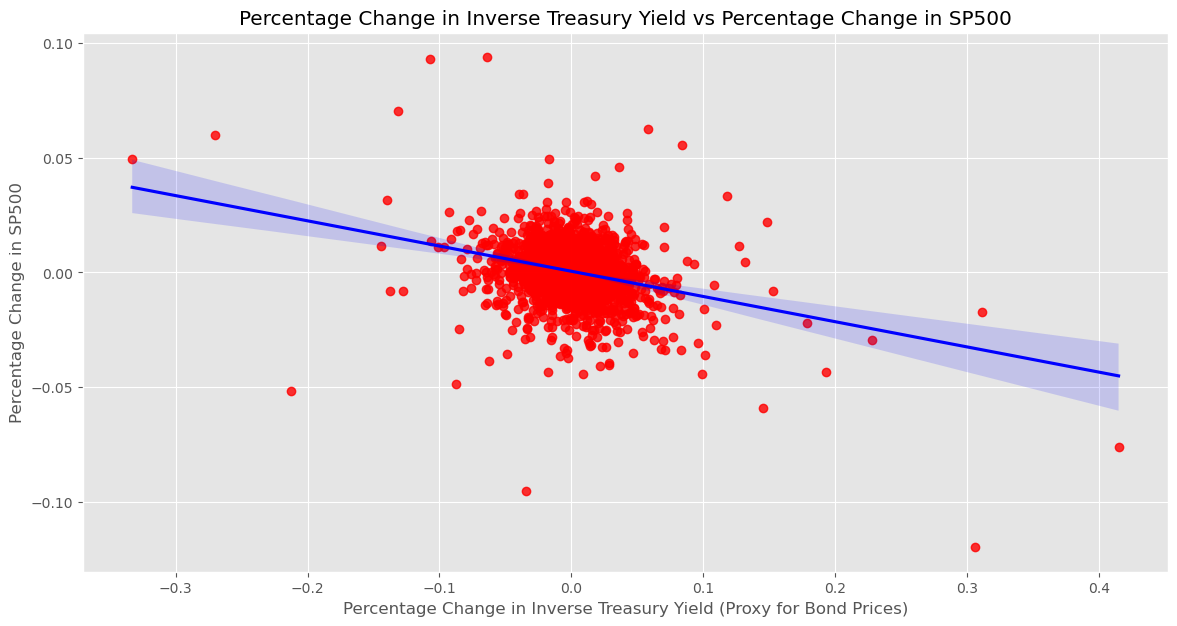

In [40]:
# using newly created column 
# Calculate percentage changes
data['Pct_Change_SP500'] = data['SP500_Close'].pct_change()
data['Pct_Change_Inverse_Yield'] = data['Inverse_Treasury_Yield'].pct_change()

# Scatter plot with regression line
plt.figure(figsize=(14, 7))
sns.regplot(x='Pct_Change_Inverse_Yield', y='Pct_Change_SP500', data=data, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title('Percentage Change in Inverse Treasury Yield vs Percentage Change in SP500')
plt.xlabel('Percentage Change in Inverse Treasury Yield (Proxy for Bond Prices)')
plt.ylabel('Percentage Change in SP500')
plt.show()



In [42]:
# Conclusion 1
# So we can see from numbers and the heatmap too that the SP500 index has a strong upward trend over time, 
# high correlation with the date.
# Concusion 2
# There is a inverse relation with bond prices and SP500
# There is a statistically significant inverse relationship between bond prices and the S&P 500, 
# indicating that as bond prices increase, the S&P 500 tends to decrease, and vice versa.